In [49]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from web3 import Web3

In [3]:
db_path = "../data/swarmscan.db"
csv_path = "../data/fixed/banksolResultsfixed.csv"

In [4]:
w3 = Web3()
bank_overlay = bank_overlay = w3.keccak(text="BANK")
bank_overlay = bank_overlay.hex()
bank_overlay

'0x7969942589b385a4e9a8aef4722c212233a04538ccac2ef459b60fa28ef0690b'

In [5]:
# Function to read data from a table and return a DataFrame
def read_table(table_name):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Execute SQL query to fetch data from the table
    cursor.execute(f"SELECT * FROM {table_name}")

    # Fetch all rows from the cursor
    rows = cursor.fetchall()

    # Convert fetched data into a DataFrame
    df = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])

    # Close the cursor and the connection
    cursor.close()
    conn.close()

    return df

In [6]:
rounds_df = read_table("rounds")
reveals_df = read_table("reveals")
originalWinners_df = read_table("originalWinners")
originalFrozens_df = read_table("originalFrozens")

reveals_df.head()

,rid,roundNumber,overlay,stake,stakeDensity,reserveCommitment,depth
0,4,205956,0xd4c35984bfe389e7b5428177d88f05c27fd1aaedfc6f...,1.000000e+17,1.024000e+20,0x5023a503d4e3a81205ef10080590a32b74da4932fab9...,10
1,5,205956,0xd4d52e74549efe1568447d8cddb3880b1be0c154a1f8...,1.000000e+17,1.024000e+20,0x5023a503d4e3a81205ef10080590a32b74da4932fab9...,10
2,6,205956,0xd4c12880023a185374f9254f8c6aa0cf8d3670574893...,1.000000e+17,1.024000e+20,0x5023a503d4e3a81205ef10080590a32b74da4932fab9...,10
3,7,205956,0xd4e963b287a5458a37dbcae5a4b5b02d83253365c23a...,1.000000e+17,1.024000e+20,0x5023a503d4e3a81205ef10080590a32b74da4932fab9...,10
4,1,205955,0x9023c57f512c320aab80a0f195a36642bbb35ed15845...,1.000000e+17,1.024000e+20,0xeab650c167a7384404ec5411c4fba154e45c3f9553c2...,10


In [7]:
csvpath = "../data/fixed/banksolResultsfixed.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csvpath)

# Display the DataFrame
df.head()  # This will display the first few rows of the DataFrame


,Round Number,Winner,Depth,Stake,Stake Density,Hash,pot,Reward,MajorityReveal,ReserveCommitments
0,180291,0x807d8e616aabd519d153825df254debbd5ccf38dbb98...,8,100000000000000000,25600000000000000000,0x3a1f57fef6b7b697e21265a2a7da2ea046bd452b40fd...,116847081947136000,116847081947136000,0x3a1f57fef6b7b697e21265a2a7da2ea046bd452b40fd...,[object Object]
1,180307,0x63fd5eb300841662953a0128c0800cb1e45ef2f022cc...,8,100000000000000000,25600000000000000000,0x6ac1d046bca73432e0e1d66203ff48831d8dfe6ac388...,64038887227392000,64038887227392000,0x6ac1d046bca73432e0e1d66203ff48831d8dfe6ac388...,[object Object]
2,180338,0x9e87a92d87e1c5d780c4ba13ba26ce4bc2f9a8fd26e1...,8,100000000000000000,25600000000000000000,0xead244cfcf260b3484d8adf523784424689a22452bf7...,64880665165824000,64880665165824000,0xead244cfcf260b3484d8adf523784424689a22452bf7...,[object Object]
3,180342,0x7969942589b385a4e9a8aef4722c212233a04538ccac...,0,25600000000000000000,25600000000000000000,0x263ba02bd7d12c24b91ede8abc154e534dfa6fff2b34...,64031620595712000,64031620595712000,0xda9fc670034147948d65baa1e4770c6ccd961c33d4ed...,[object Object]
4,180346,0x587ae0eb3a7149be0c90f01a5b30d1f0701abfbafce9...,8,100000000000000000,25600000000000000000,0x4263fa9dc2c1e81c6988da9679a5f956530075f90fbb...,64878903558144000,128910524153856000,0x4263fa9dc2c1e81c6988da9679a5f956530075f90fbb...,[object Object]


In [8]:
 # Read CSV data into a DataFrame
def process_data(csv_path):
        CSVDATA = pd.read_csv(csv_path)

        # Initialize variables
        number_minority_wins = 0
        amount_minority_reward = 0
        number_majority_wins = 0
        amount_majority_reward = 0
        amount_bank_wins = 0

        # Iterate over each row in the DataFrame
        for index, row in CSVDATA.iterrows():
            reward = int(row['Reward'])  # Convert reward to integer
            if row['Hash'] == row['MajorityReveal']:
                number_majority_wins += 1
                amount_majority_reward += reward
            if row['Winner'] == bank_overlay:
                amount_bank_wins += 1
            elif row['Hash'] != row['MajorityReveal']:
                number_minority_wins += 1
                amount_minority_reward += reward

        # Calculate percentages
        total_rounds = len(CSVDATA)
        percent_minority_wins = (number_minority_wins / total_rounds) * 100
        percent_majority_wins = (number_majority_wins / total_rounds) * 100
        percent_bank_wins = (amount_bank_wins / total_rounds) * 100

        # Print results
        print(f"Number of rounds where minority wins: {number_minority_wins}")
        print(f"Amount rewarded to minority: {amount_minority_reward}")
        print(f"Number of rounds where majority wins: {number_majority_wins}")
        print(f"Amount rewarded to majority: {amount_majority_reward}")
        print(f"Number of rounds where bank wins: {amount_bank_wins}")
        print(f"Percentage of rounds where minority wins: {percent_minority_wins}%")
        print(f"Percentage of rounds where majority wins: {percent_majority_wins}%")
        print(f"Percentage of rounds won by the bank: {percent_bank_wins}%")

In [9]:
process_data("../data/fixed/banksolResultsfixed.csv")

Number of rounds where minority wins: 1088
Amount rewarded to minority: 313189112202825564160
Number of rounds where majority wins: 4940
Amount rewarded to majority: 1607994971526709379070
Number of rounds where bank wins: 967
Percentage of rounds where minority wins: 15.553967119370979%
Percentage of rounds where majority wins: 70.62187276626162%
Percentage of rounds won by the bank: 13.824160114367407%


In [36]:
def get_original_contract_test_data():
    CSVDATA = pd.read_csv("../data/fixed/banksolResultsfixed.csv")
    winners = []
    majorityReveals = []
    for index, row in CSVDATA.iterrows():
       
        rndnr = row["Round Number"]
        winner_data = originalWinners_df[originalWinners_df['roundNumber'] == rndnr]
        #print(winner_data)
        winners.append(winner_data)
        reveals_data = reveals_df[reveals_df['roundNumber'] == rndnr]
        
        reserve_commitments_count = {}
        for reveal_index, reveal_row in reveals_data.iterrows():
            reserve_commitment = reveal_row['reserveCommitment']
            reserve_commitments_count[reserve_commitment] = reserve_commitments_count.get(reserve_commitment, 0) + 1
        
        # Find the most common reserveCommitment (majority reveal)
        most_common_commitment = max(reserve_commitments_count, key=reserve_commitments_count.get)
        majorityReveals.append(most_common_commitment)
    return winners, majorityReveals



In [1]:
def plot_swarmscanapi_data():
    pass

SyntaxError: incomplete input (2836225493.py, line 1)

In [124]:
def get_original_contract_test_data_stake_based(csv_path):
    CSVDATA = pd.read_csv(csv_path)
    winners = []
    majorityReveals = []
    reserve_commit_to_stake_maps = []
    for index, row in CSVDATA.iterrows():
       
        rndnr = row["Round Number"]
        winner_data = originalWinners_df[originalWinners_df['roundNumber'] == rndnr]
        #print(winner_data)
        reveals_data = reveals_df[reveals_df['roundNumber'] == rndnr]
        reserve_commitments_stake = {}
        for reveal_index, reveal_row in reveals_data.iterrows():
            reserve_commitment = reveal_row['reserveCommitment']
            stake = reveal_row['stakeDensity']
            reserve_commitments_stake[reserve_commitment] = reserve_commitments_stake.get(reserve_commitment, 0) + stake
        
        # Find the most common reserveCommitment (majority reveal)
        # if len(reserve_commitments_stake) < 2:
        #     continue

        most_common_commitment = max(reserve_commitments_stake, key=reserve_commitments_stake.get)
        winners.append(winner_data)
        majorityReveals.append(most_common_commitment)
        reserve_commit_to_stake_maps.append(reserve_commitments_stake)
    return winners, majorityReveals, reserve_commit_to_stake_maps



In [38]:
def process_original_contract_test_data():
    # Get winners and majority reveals
    winners, majority_reveals = get_original_contract_test_data()
    
    # Initialize variables
    number_minority_wins = 0
    amount_minority_reward = 0
    number_majority_wins = 0
    amount_majority_reward = 0
    amount_bank_wins = 0
    total_rounds = len(winners)  # Assuming winners and majority_reveals have the same length

    # Iterate over each round
    for winner, majority_reveal in zip(winners, majority_reveals):
        #print(winner["hash"].item())
        reserveCommitment = winner["hash"].item()
        reward = winner["rewardAmount"].item()
        #print(majority_reveal)
        if reserveCommitment == majority_reveal:
            number_majority_wins += 1
            # Add reward to majority reward
            amount_majority_reward += reward 
        if reserveCommitment == bank_overlay:
            amount_bank_wins += 1
        elif reserveCommitment != majority_reveal:
            number_minority_wins += 1
            # Add reward to minority reward
            amount_minority_reward += reward 

    # Calculate percentages
    percent_minority_wins = (number_minority_wins / total_rounds) * 100
    percent_majority_wins = (number_majority_wins / total_rounds) * 100
    percent_bank_wins = (amount_bank_wins / total_rounds) * 100

    # Print results
    print(f"Number of rounds where minority wins: {number_minority_wins}")
    print(f"Amount rewarded to minority: {amount_minority_reward}")
    print(f"Number of rounds where majority wins: {number_majority_wins}")
    print(f"Amount rewarded to majority: {amount_majority_reward}")
    print(f"Number of rounds where bank wins: {amount_bank_wins}")
    print(f"Percentage of rounds where minority wins: {percent_minority_wins}%")
    print(f"Percentage of rounds where majority wins: {percent_majority_wins}%")
    print(f"Percentage of rounds won by the bank: {percent_bank_wins}%")

In [39]:
process_original_contract_test_data()

Number of rounds where minority wins: 1367
Amount rewarded to minority: 338429156752906780672
Number of rounds where majority wins: 5628
Amount rewarded to majority: 1583226431385695682560
Number of rounds where bank wins: 0
Percentage of rounds where minority wins: 19.54253037884203%
Percentage of rounds where majority wins: 80.45746962115797%
Percentage of rounds won by the bank: 0.0%


In [129]:
def plot_rewards_over_rounds(csv_path):
    # Read the CSV file
    CSVDATA = pd.read_csv(csv_path)

    # Initialize variables
    rewards_minority = []
    rewards_majority = []
    rewards_bank = []
    rounds_processed = []

    # Iterate over each row in the DataFrame
    for index, row in CSVDATA.iterrows():
        #print(index)
        reward = int(row['Reward'])  # Convert reward to integer

        if row['Winner'] == bank_overlay:
            print(rewards_bank)
            if len(rewards_bank) > 0:
                cumulative_reward = rewards_bank[index-1] + reward
                rewards_minority.append(rewards_minority[index-1])
                rewards_majority.append(rewards_majority[index-1])
                rewards_bank.append(cumulative_reward)
            else:
                rewards_minority.append(0)
                rewards_majority.append(0)
                rewards_bank.append(reward)
        
        elif row['Hash'] != row['MajorityReveal']:
          #  print(f"minrewlen {len(rewards_minority)}")
            if len(rewards_minority)> 0:
                cumulative_reward = rewards_minority[index-1] + reward
                rewards_minority.append(cumulative_reward)
                rewards_majority.append(rewards_majority[index-1])
                rewards_bank.append(rewards_bank[index-1])
            else:
                rewards_minority.append(reward)
                rewards_majority.append(0)
                rewards_bank.append(0)
            
        
        elif row['Hash'] == row['MajorityReveal']:
         #  print(f"majrewlen {len(rewards_majority)}")

           if len(rewards_majority)> 0:
                cumulative_reward = rewards_majority[index-1] + reward
                rewards_minority.append(rewards_minority[index-1])
                rewards_majority.append(cumulative_reward)
                rewards_bank.append(rewards_bank[index-1])
           else:
                rewards_minority.append(0)
                rewards_majority.append(reward)
                rewards_bank.append(0)
               
        rounds_processed.append(index + 1)  # Index starts from 0, so add 1 for the round number

    # Plot the rewards over the number of rounds processed
    plt.figure(figsize=(10, 6))
    plt.plot(rounds_processed, rewards_minority, label='Minority Reward', color='blue')
    plt.plot(rounds_processed, rewards_majority, label='Majority Reward', color='green')
    plt.plot(rounds_processed, rewards_bank, label='Bank reward carryover', color='red')

    plt.xlabel('Rounds Processed')
    plt.ylabel('Reward')
    plt.title('Rewards Over Rounds Processed')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
plot_rewards_over_rounds("../data/fixed/banksolResultsfixed.csv")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



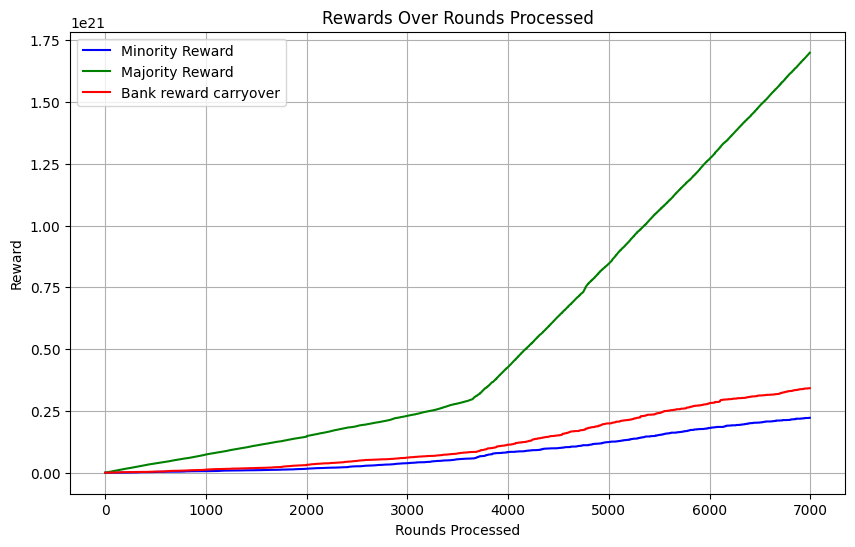

In [131]:
plot_rewards_over_rounds("../data/fixed/alphaSQRTResultsfixed.csv")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



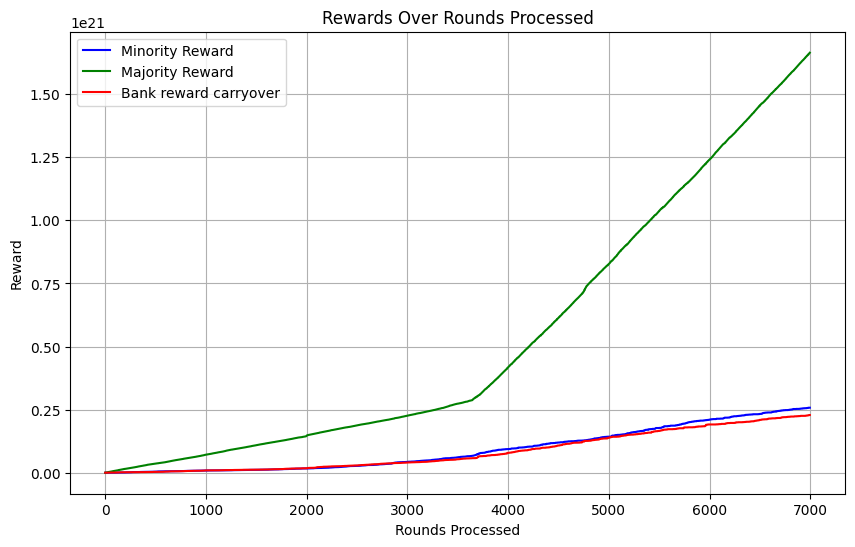

In [133]:
plot_rewards_over_rounds("../data/fixed/alphaQBRTsolResultsfixed.csv")


In [182]:
def plot_rewards_over_rounds_stake(csv_path):
    # Read the CSV file
    CSVDATA = pd.read_csv(csv_path)
    originalWinners, majorityReveals, reserve_commitments_stake = get_original_contract_test_data_stake_based(csv_path)

    # Initialize variables
    rewards_minority = []
    rewards_majority = []
    rewards_bank = []
    rounds_processed = []

    maj_stake_fractions = []
    
    # Iterate over each row in the DataFrame
    for index, row in CSVDATA.iterrows():
        if len(reserve_commitments_stake[index]) < 2:
             continue
       
        reward = int(row['Reward'])  # Convert reward to integer
        # majRvl = row['MajorityReveal']
        majRvl = majorityReveals[index]
        maj_stake_fractions.append(reserve_commitments_stake[index][majRvl] / sum(reserve_commitments_stake[index].values()))

        if index < 10:
        #     print(index)
             # print(reserve_commitments_stake[index])
            print(reserve_commitments_stake[index][majRvl] / sum(reserve_commitments_stake[index].values()))
        
        if row['Winner'] == bank_overlay:
            # print(rewards_bank)
           
            rewards_minority.append(0)
            rewards_majority.append(0)
            rewards_bank.append(reward)
        
        elif row['Hash'] != majRvl:
          #  print(f"minrewlen {len(rewards_minority)}")
            
            rewards_minority.append(reward)
            rewards_majority.append(0)
            rewards_bank.append(0)
            
        
        elif row['Hash'] == majRvl:
         #  print(f"majrewlen {len(rewards_majority)}")

     
            rewards_minority.append(0)
            rewards_majority.append(reward)
            rewards_bank.append(0)
               
        rounds_processed.append(index + 1)  # Index starts from 0, so add 1 for the round number

   # Zip maj_stake_fractions with the corresponding y-axis lists
    zipped_data = list(zip(maj_stake_fractions, rewards_minority, rewards_majority, rewards_bank))
    
    # Sort zipped data based on maj_stake_fractions
    sorted_data = sorted(zipped_data, key=lambda x: x[0], reverse=True)
    
    # Unzip the sorted data into separate lists
    sorted_maj_stake_fractions, sorted_rewards_minority, sorted_rewards_majority, sorted_rewards_bank = zip(*sorted_data)
    
    # Define the bin edges
    bin_edges = np.arange(0, 1, 0.1)
    print(bin_edges)
    
    # Group the data into bins
    bin_indices = np.digitize(sorted_maj_stake_fractions, bin_edges)
    # print(bin_indices)
    # Calculate the rewards for each bin
    binned_rewards_minority = np.zeros_like(bin_edges)
    binned_rewards_majority = np.zeros_like(bin_edges)
    binned_rewards_bank = np.zeros_like(bin_edges)
    
    for i, bin_index in enumerate(bin_indices):
        binned_rewards_minority[bin_index-1] += sorted_rewards_minority[i]
        binned_rewards_majority[bin_index-1] += sorted_rewards_majority[i]
        binned_rewards_bank[bin_index-1] += sorted_rewards_bank[i]
    
    #Plot the bar plot
    plt.figure(figsize=(10, 6))
    
    bar_width = 0.03  # Adjust the width of the bars
    offset = 0.03     # Adjust the offset between each set of bars
    
    # Plot the bars for each category with appropriate offsets
    plt.bar(bin_edges, binned_rewards_majority, label='Majority Reward', color='green', alpha=0.5, width=bar_width)
    plt.bar(bin_edges - offset, binned_rewards_minority, label='Minority Reward', color='blue', alpha=0.5, width=bar_width)
    plt.bar(bin_edges + offset, binned_rewards_bank, label='Bank Reward Carryover', color='red', alpha=0.5, width=bar_width)


    plt.xlabel('Majority Stake Fractions')
    plt.ylabel('Reward')

    #title setting
    if csv_path == "../data/fixed/banksolResultsfixed.csv":
           plt.title('Bank Solution Reward')
    
    elif csv_path == "../data/fixed/alphaSQRTResultsfixed.csv":
           plt.title('Alpha (sqrt) Reward')
    elif csv_path == "../data/fixed/alphaQBRTResultsfixed.csv":
           plt.title('Alpha (cbrt) Reward')
    elif csv_path == "../data/chaotic/bankSolChaosResults.csv":
           plt.title('Bank Solution Reward Chaos Rounds')
    elif csv_path == "../data/chaotic/alphaSQRTchaosResults.csv":
           plt.title('Alpha (sqrt) Reward Chaos Rounds')
    elif csv_path == "../data/chaotic/alphaCBRTchaosResults.csv":
           plt.title('Alpha (cbrt) Reward Chaos Rounds')
    
    else:
           plt.title('Rewards Over Majority Stake Fractions (Binned)')
    plt.legend()
    plt.grid(True)

     # Set the x-axis tick marks to match the bin edges
    plt.xticks(bin_edges)

    # Set the same y-axis limits for all plots
    # max_reward = max(max(binned_rewards_minority), max(binned_rewards_majority), max(binned_rewards_bank))
    # plt.ylim(0, max_reward + 100)  # Adjust the upper limit as needed
    #for normal rounds
    # plt.ylim(0, 8 * 1e20)
    #for chaos rounds
    plt.ylim(0, 8 * 1e19)

    plt.xticks(bin_edges)
    plt.gca().invert_xaxis()
    plt.savefig('my_plot.png', dpi=300)
    plt.show()


0.8333333333333334
0.9523809523809523
0.9333333333333333
0.8
0.9230769230769231
0.875
0.9824561403508771
0.9961089494163424
0.75
0.7272727272727273
[0.3 0.4 0.5 0.6 0.7 0.8 0.9]


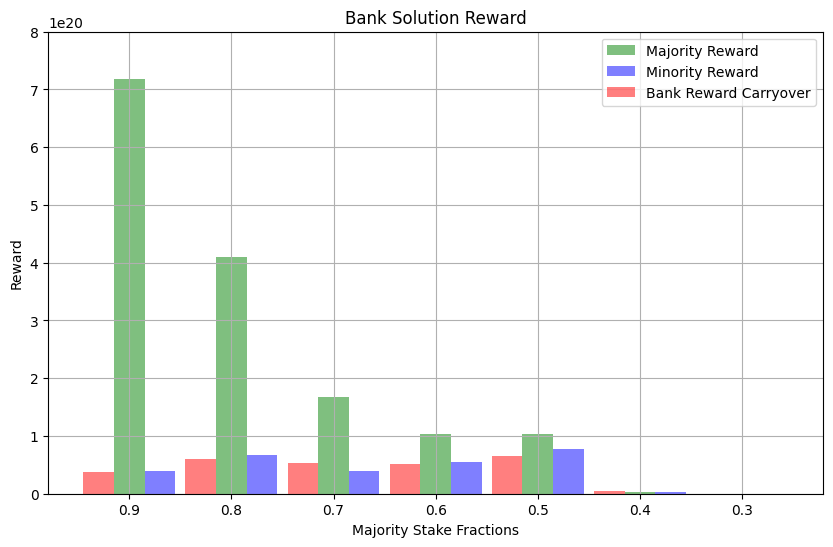

In [162]:
plot_rewards_over_rounds_stake("../data/fixed/banksolResultsfixed.csv")


0.8333333333333334
0.9523809523809523
0.9333333333333333
0.8
0.9230769230769231
0.875
0.9824561403508771
0.9961089494163424
0.75
0.7272727272727273
[0.3 0.4 0.5 0.6 0.7 0.8 0.9]


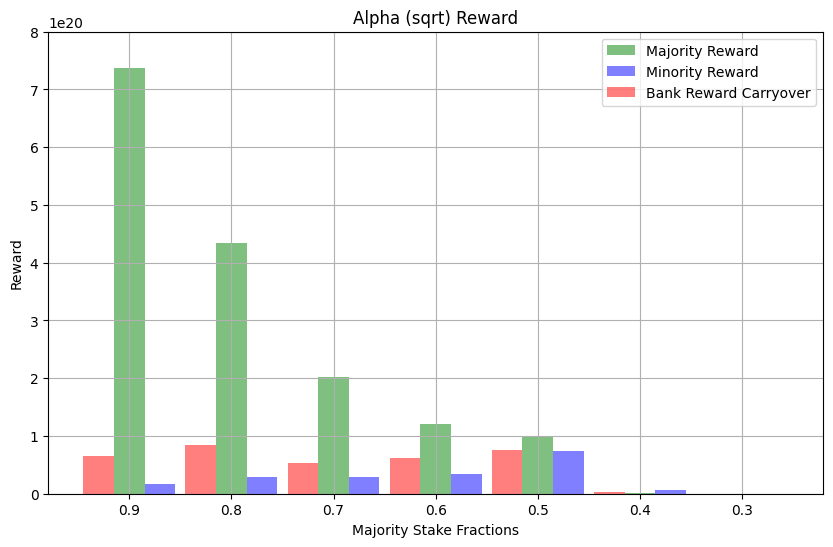

In [163]:
plot_rewards_over_rounds_stake("../data/fixed/alphaSQRTResultsfixed.csv")


0.8333333333333334
0.9523809523809523
0.9333333333333333
0.8
0.9230769230769231
0.875
0.9824561403508771
0.9961089494163424
0.75
0.7272727272727273
[0.3 0.4 0.5 0.6 0.7 0.8 0.9]


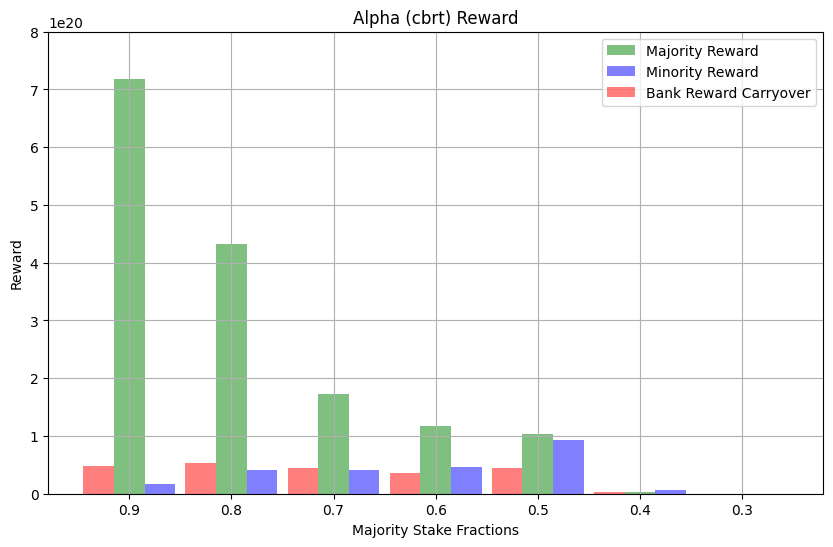

In [164]:
plot_rewards_over_rounds_stake("../data/fixed/alphaQBRTResultsfixed.csv")


0.5133689839572193
0.4444444444444444
0.42857142857142855
0.4
0.45454545454545453
0.5601750547045952
0.3333333333333333
0.5406546990496304
0.9696969696969697
0.5783132530120482
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


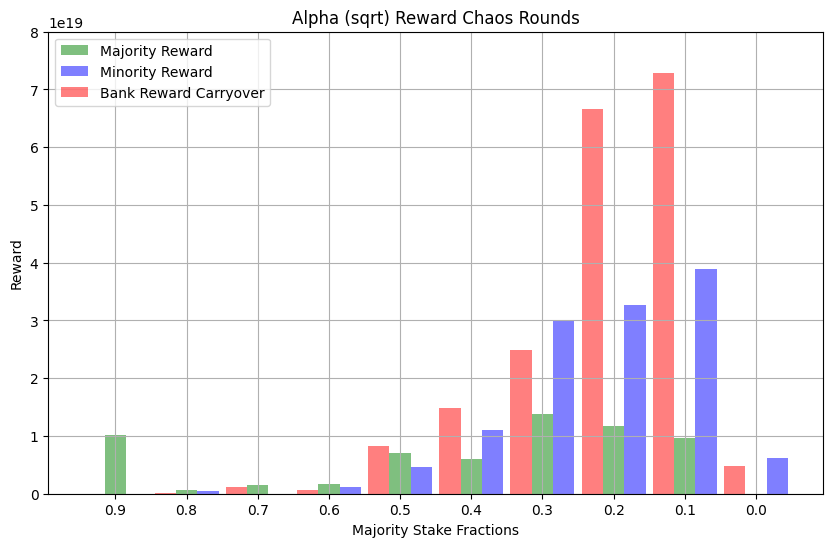

In [180]:
plot_rewards_over_rounds_stake("../data/chaotic/alphaSQRTchaosResults.csv")


0.5133689839572193
0.4444444444444444
0.42857142857142855
0.4
0.45454545454545453
0.5601750547045952
0.3333333333333333
0.5406546990496304
0.9696969696969697
0.5783132530120482
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


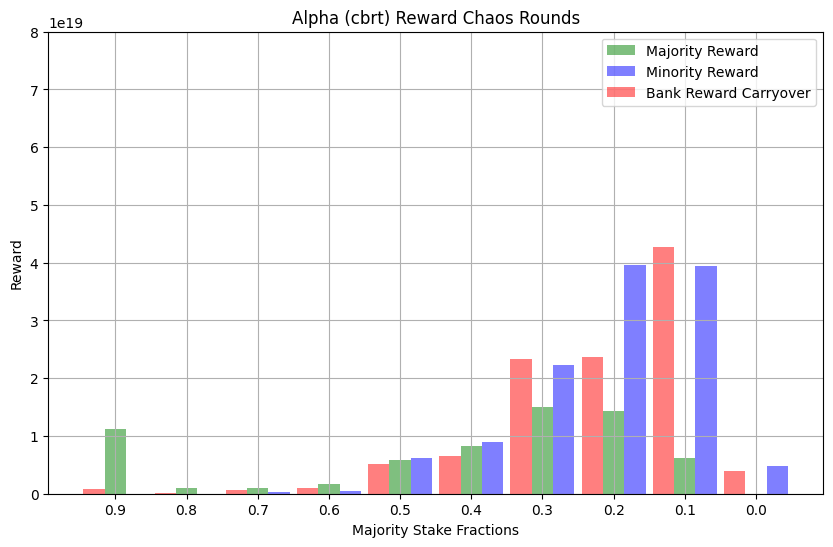

In [183]:
plot_rewards_over_rounds_stake("../data/chaotic/alphaCBRTchaosResults.csv")

0.5133689839572193
0.4444444444444444
0.42857142857142855
0.4
0.45454545454545453
0.5601750547045952
0.3333333333333333
0.5406546990496304
0.9696969696969697
0.5783132530120482
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


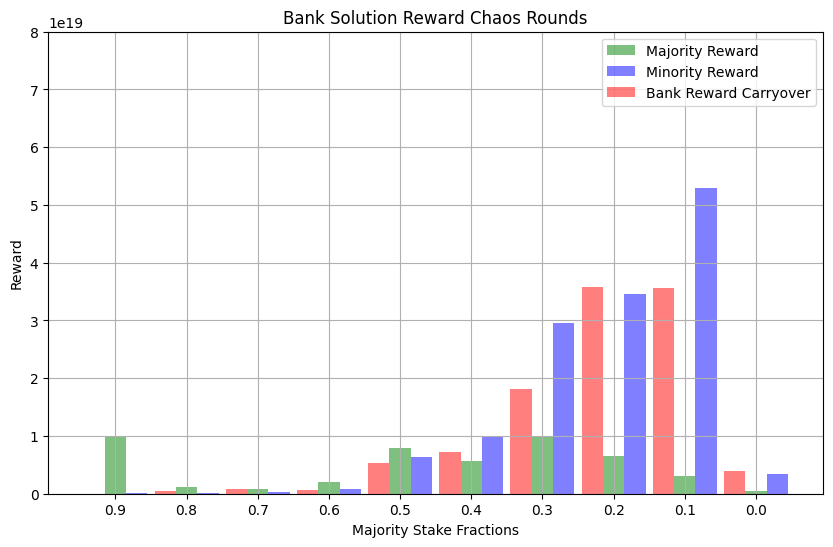

In [184]:
plot_rewards_over_rounds_stake("../data/chaotic/bankSolChaosResults.csv")
